# Modeling

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore')
from sklearn.linear_model import LinearRegression
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Read data from Test and Train csv file


In [317]:
data_train = pd.read_csv('train_test_data/train_data.csv')
data_test = pd.read_csv('train_test_data/test_data.csv')
data_train.head()

,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Mobile network,Price
0,1,0,-0.635926,1.586480,-0.289721,1,0.821500,4.0,23690.0
1,1,3,0.102449,0.079245,-0.556342,0,0.386249,5.0,7490.0
2,0,1,-0.635926,0.079245,0.762394,0,0.396401,4.0,4490.0
3,1,0,0.102449,0.079245,-0.289721,1,0.821500,4.0,27490.0
4,0,3,0.102449,0.079245,0.762394,0,-1.295536,4.0,5350.0


### Data information

#### Data train information

In [318]:
data_train.head()

,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Mobile network,Price
0,1,0,-0.635926,1.586480,-0.289721,1,0.821500,4.0,23690.0
1,1,3,0.102449,0.079245,-0.556342,0,0.386249,5.0,7490.0
2,0,1,-0.635926,0.079245,0.762394,0,0.396401,4.0,4490.0
3,1,0,0.102449,0.079245,-0.289721,1,0.821500,4.0,27490.0
4,0,3,0.102449,0.079245,0.762394,0,-1.295536,4.0,5350.0


- Data train has 1241 records
- No fields are null

#### Data test information

In [319]:
data_test.head()

,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Mobile network,Price
0,1,1,0.840825,0.079245,-0.450843,0,0.386249,4.0,6152
1,1,1,0.840825,0.079245,0.762394,0,0.014435,4.0,8990
2,1,1,0.840825,0.079245,0.762394,0,0.386249,5.0,8190
3,0,1,-2.095371,-1.928439,-6.270865,0,0.014435,4.0,450
4,1,3,2.317575,2.088892,-0.116763,0,0.014435,5.0,18750


- Data test has 533 records
- No fields are null

### Modeling Train Data

#### Get x_train and y_train in data_train


In [320]:
x_train = data_train.drop('Price', axis=1)
x_train

,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Mobile network
0,1,0,-0.635926,1.586480,-0.289721,1,0.821500,4.0
1,1,3,0.102449,0.079245,-0.556342,0,0.386249,5.0
2,0,1,-0.635926,0.079245,0.762394,0,0.396401,4.0
3,1,0,0.102449,0.079245,-0.289721,1,0.821500,4.0
4,0,3,0.102449,0.079245,0.762394,0,-1.295536,4.0
...,...,...,...,...,...,...,...,...
1247,1,0,0.102449,1.586480,-0.289721,1,1.531775,5.0
1248,0,2,0.840825,0.079245,0.762394,0,0.396401,4.0
1249,0,1,0.008043,-1.867600,-1.867893,0,-2.569001,4.0
1250,1,1,0.840825,1.586480,0.410731,0,0.386249,4.0


In [321]:
y_train = data_train['Price']
y_train

0       23690.0
1        7490.0
2        4490.0
3       27490.0
4        5350.0
         ...   
1247    36990.0
1248     5790.0
1249      890.0
1250    23000.0
1251      590.0
Name: Price, Length: 1252, dtype: float64

#### Get x_test and y_test in data_test

In [322]:
x_test = data_test.drop(['Price'], axis=1)
x_test

,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Mobile network
0,1,1,0.840825,0.079245,-0.450843,0,0.386249,4.0
1,1,1,0.840825,0.079245,0.762394,0,0.014435,4.0
2,1,1,0.840825,0.079245,0.762394,0,0.386249,5.0
3,0,1,-2.095371,-1.928439,-6.270865,0,0.014435,4.0
4,1,3,2.317575,2.088892,-0.116763,0,0.014435,5.0
...,...,...,...,...,...,...,...,...
413,1,1,0.840825,0.079245,0.762394,0,0.386249,5.0
414,0,0,-1.005114,0.079245,-0.289721,1,-1.483694,5.0
415,1,0,0.102449,2.088892,-0.289721,1,0.821500,4.0
416,1,3,0.840825,2.088892,-2.226741,0,0.690798,5.0


In [323]:
y_test = data_test['Price']
y_test

,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Mobile network
0,1,1,0.840825,0.079245,-0.450843,0,0.386249,4.0
1,1,1,0.840825,0.079245,0.762394,0,0.014435,4.0
2,1,1,0.840825,0.079245,0.762394,0,0.386249,5.0
3,0,1,-2.095371,-1.928439,-6.270865,0,0.014435,4.0
4,1,3,2.317575,2.088892,-0.116763,0,0.014435,5.0
...,...,...,...,...,...,...,...,...
413,1,1,0.840825,0.079245,0.762394,0,0.386249,5.0
414,0,0,-1.005114,0.079245,-0.289721,1,-1.483694,5.0
415,1,0,0.102449,2.088892,-0.289721,1,0.821500,4.0
416,1,3,0.840825,2.088892,-2.226741,0,0.690798,5.0


### Creating and Modeling using Linear Regression

#### Create Linear Regression model

In [324]:
lrg = LinearRegression()

In [325]:
lrg.fit(x_train, y_train)

LinearRegression()

#### Fit Linear Regression model

In [326]:
y_pred = lrg.predict(x_test)

#### Visual test ajnd predict result

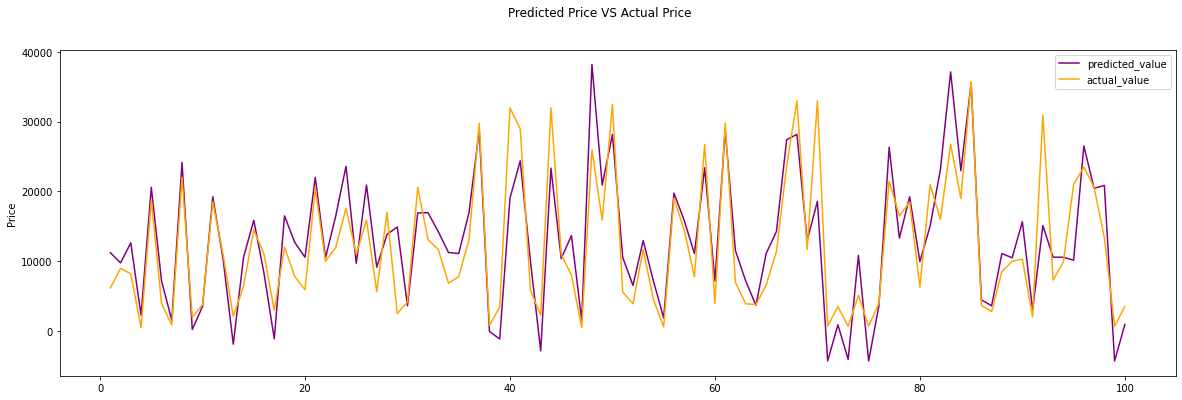

In [327]:
def plot_residuals(y_test, y_pred):
  indexes = list(range(1, len(y_pred)+1))[:100]
  fig, axs = plt.subplots(1, 1, figsize=(20, 6), sharey=True)
  axs.plot(indexes, y_pred[:100], label='predicted_value', color='purple')
  axs.plot(indexes, y_test[:100], label='actual_value', color='orange')
  axs.legend()
  axs.set_ylabel('Price')
  fig.suptitle('Predicted Price VS Actual Price')
  plt.show()

plot_residuals(y_test, y_pred)

#### Evaluate Linear Regression model

In [328]:
def accuracy_score(y_test, y_pred, algorithm):
  # r2_score
  R2 = r2_score(y_test, y_pred)
  # RMSE
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  # MAE
  mae = mean_absolute_error(y_test, y_pred)
  # return the results
  return (R2, rmse, mae)


In [329]:
R2_linear, rmse_linear, mae_linear = accuracy_score(y_test, y_pred, lrg)
print('R2:', R2_linear)
print('RMSE:', rmse_linear)
print('MAE:', mae_linear)

R2: 0.7317972816493257
RMSE: 5241.079153427763
MAE: 3947.1287688601683


### Creating and Modeling using XGBoost Regression

#### Hyperparameter tuning

In [330]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

* **n_estimators**: number of trees you want to build
* **max_depth**: maximum depth of a tree
* **booster**: default = `gbtree`, gbtree use tree based models while gblinear uses linear functions
* **learning_rate**: step size, [0,1]
* **min_child_weight**: minimum sum of instance weight needed a child
* **base_score**: default = 0.5, the initial prediction score of all instances, global bias

#### Define the grid of hyperparameters to search

In [331]:
parameter_grid = {
  'n_estimators': n_estimators,
  'max_depth':max_depth,
  'learning_rate':learning_rate,
  'min_child_weight':min_child_weight,
  'booster':booster,
  'base_score':base_score
}

### Initialize Model and set up the RandomizedSearch

In [332]:
regressor = xgboost.XGBRegressor()

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=parameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 3,
            verbose = 5,
            return_train_score = True,
            random_state=42)

- n_iter: num iteration to run RandomizedSearch
- scoring: scoring function
- n_jobs: num job to run

### Train to find best estrimator

In [333]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resource

[19:04:04] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:04:04] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:04:04] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=50, n_jobs=3,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

#### Find best estimator

In [334]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

#### Find best params

In [335]:
random_cv.best_params_

{'n_estimators': 900,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.1,
 'booster': 'gbtree',
 'base_score': 1}

### Initialize Model again with best params

In [336]:
regressor = xgboost.XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
             monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1)

#### Fit Model on train data

In [337]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

#### Predict on test data

In [338]:
y_pred_advanced = regressor.predict(x_test)

#### Visualize the result

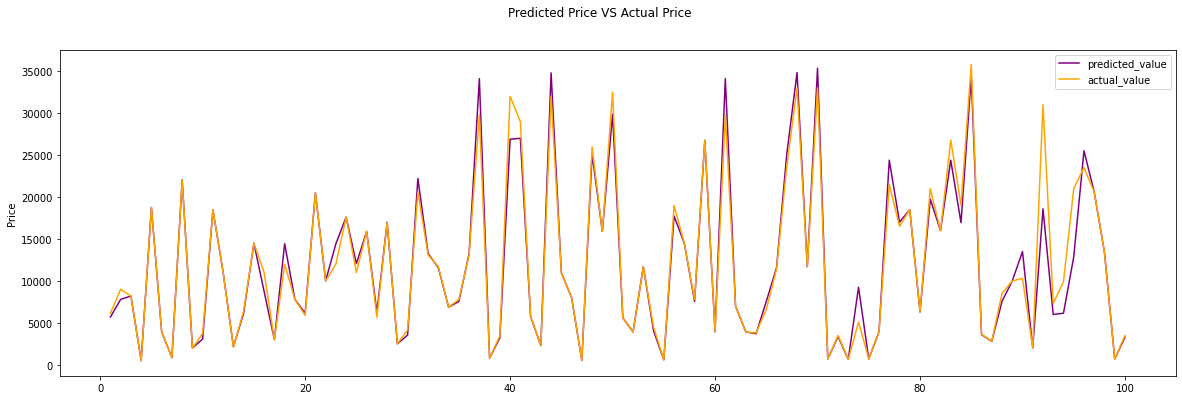

In [339]:
plot_residuals(y_test, y_pred_advanced)

### Evaluate the model

In [340]:
R2_xgboost, rmse_xgboost, mae_xgboost = accuracy_score(y_test, y_pred_advanced, regressor)

In [341]:
print('R2:', R2_xgboost)
print('RMSE:', rmse_xgboost)
print('MAE:', mae_xgboost)

R2: 0.9445297702144101
RMSE: 2383.5217183135505
MAE: 1057.4660599265942


### Compare between Linear Regression and XGBoost Regression

In [342]:
results = pd.DataFrame(columns=['Algorithm', 'R2', 'RMSE', 'MAE'])
results.loc[0] = ['Linear Regression', R2_linear, rmse_linear, mae_linear]
results.loc[1] = ['XGBoost Regression', R2_xgboost, rmse_xgboost, mae_xgboost]
results.head()

,Algorithm,R2,RMSE,MAE
0,Linear Regression,0.731797,5241.079153,3947.128769
1,XGBoost Regression,0.944530,2383.521718,1057.466060


- XGBoost Regression has better performance than Linear Regression
- RMSE and MAE of XGBoost Regression are small, that this model is very good and can be used for future prediction

### Summary

- Because the number of phones on the market is limited, the data is not much for better accuracy.
- Between Linear Regression and XGBoost Regression, XGBoost Regression has better performance, has evaluated better than Linear Regression because R2 is high accuracy, RMSE and MAE are better and smaller. 